# **Shipman's Statistical Legacy**

Harold Shipman tornou-se notório em todo o mundo como um dos maiores assassinos em série de todos os tempos. Com 215 vítimas confirmadas e 45 vítimas prováveis, identificadas por um inquérito público. Um inquérito que depositou considerável confiança em provas estatísticas.

O objetivo deste projeto é recriar as analises feitas por David
Spiegelhalter e Nicky Best, presentes no livro "The Art of Statistics" e no artigo "Shipman's Statistical Legacy", que explicam como as técnicas de controle de qualidade industrial podem ser adaptadas para sinalizar quando as taxas de mortalidade entre os pacientes de um médico são surpreendentemente altas.





---



## ***Imports***

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('pastel')
sns.set_style('whitegrid')

In [2]:
victims = pd.read_csv('/content/00-1-shipman-confirmed-victims-x.csv')
victims

,DateofDeath,Name,Age,PlaceofDeath,Decision,yearOfDeath,gender,fractionalDeathYear,ageBracket,gender2
0,17-Mar-75,Eva Lyons,70,Own home,Unlawful killing,1975,0,1974.71,70-74,Women
1,07-Aug-78,Sarah Hannah Marsland,86,Own home,Unlawful killing,1978,0,1978.10,85-89,Women
2,30-Aug-78,Mary Ellen Jordan,73,Own home,Unlawful killing,1978,0,1978.16,70-74,Women
3,07-Dec-78,Harold Bramwell,73,Own home,Unlawful killing,1978,1,1978.44,70-74,Men
4,20-Dec-78,Annie Campbell,88,Own home,Unlawful killing,1978,0,1978.47,85-89,Women
...,...,...,...,...,...,...,...,...,...,...
210,20-Mar-98,Ada Warburton,77,Own home,Unlawful killing,1998,0,1997.72,75-79,Women
211,24-Mar-98,Martha Marley,88,Own home,Unlawful killing,1998,0,1997.73,85-89,Women
212,11-May-98,Winifred Mellor,73,Own home,Conviction,1998,0,1997.86,70-74,Women
213,12-Jun-98,Joan May Melia,73,Own home,Conviction,1998,0,1997.95,70-74,Women


In [3]:
victims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DateofDeath          215 non-null    object 
 1   Name                 215 non-null    object 
 2   Age                  215 non-null    int64  
 3   PlaceofDeath         215 non-null    object 
 4   Decision             215 non-null    object 
 5   yearOfDeath          215 non-null    int64  
 6   gender               215 non-null    int64  
 7   fractionalDeathYear  215 non-null    float64
 8   ageBracket           215 non-null    object 
 9   gender2              215 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 16.9+ KB


In [4]:
victims.describe()

,Age,yearOfDeath,gender,fractionalDeathYear
count,215.000000,215.000000,215.000000,215.000000
mean,76.186047,1992.376744,0.172093,1992.357581
std,9.625841,5.322534,0.378342,5.272663
min,41.000000,1975.000000,0.000000,1974.710000
25%,72.000000,1988.000000,0.000000,1988.260000
50%,77.000000,1995.000000,0.000000,1994.720000
75%,83.000000,1997.000000,0.000000,1996.510000
max,93.000000,1998.000000,1.000000,1997.980000


## Place of death

In [5]:
victims['PlaceofDeath'].value_counts()

PlaceofDeath
Own home             204
Shipman's surgery      6
Hospital               2
Residential Home       1
Nursing home           1
Residential home       1
Name: count, dtype: int64

In [6]:
victims['PlaceofDeath'] = victims['PlaceofDeath'].replace('Residential home', 'Residential Home')

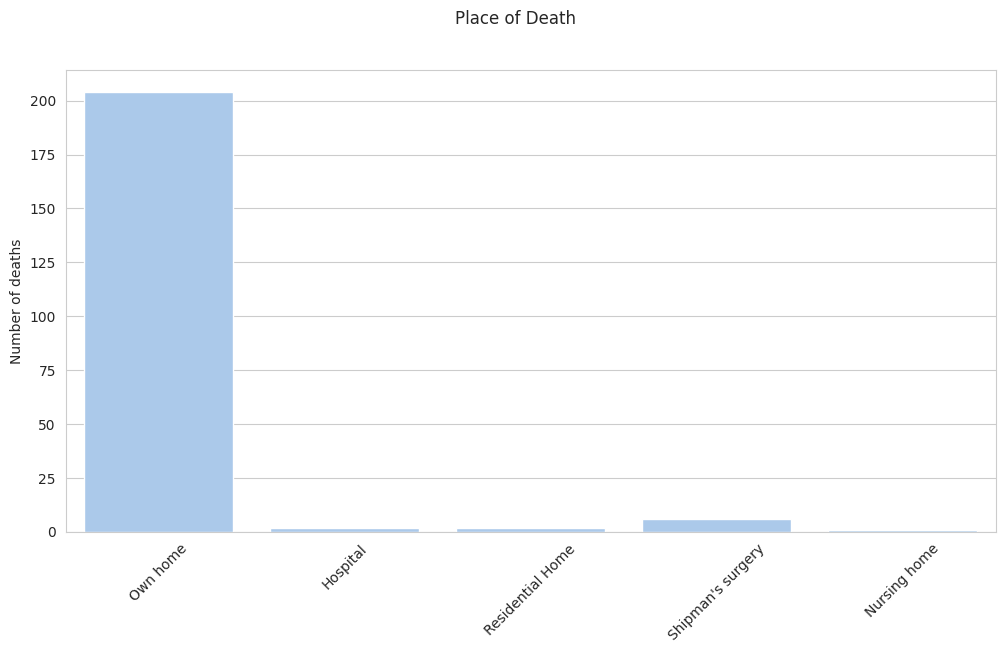

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=victims, x='PlaceofDeath')

plt.suptitle('Place of Death')
plt.xlabel('')
plt.ylabel('Number of deaths')
plt.xticks(rotation=45)
plt.show()

##  Age and sex of Shipman's victims by date of death

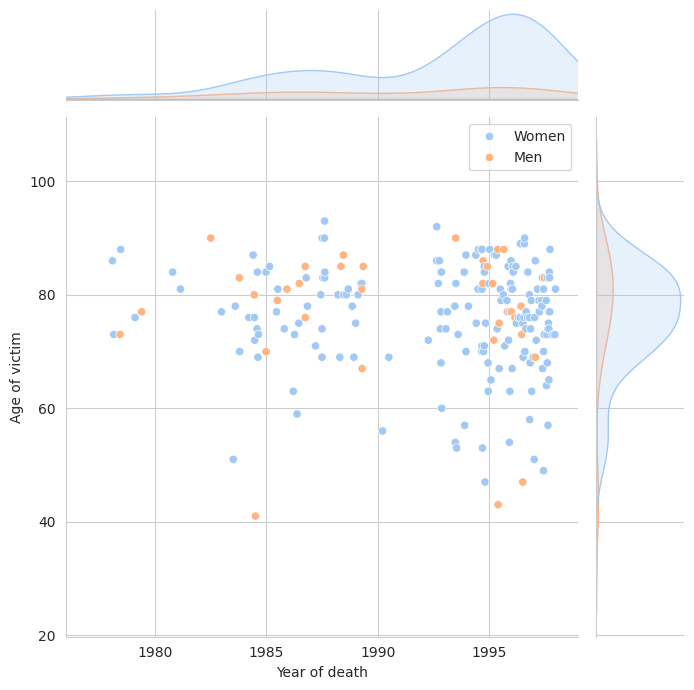

In [8]:
sns.jointplot(victims, x='fractionalDeathYear', y='Age', hue='gender2', height=7)
plt.xlim((victims['yearOfDeath'].min()+1), (victims['yearOfDeath'].max()+1))

plt.xlabel('Year of death')
plt.ylabel('Age of victim')
plt.legend()
plt.show()

## Cumulative excess death certificates signed by Shipman

In [9]:
years_death = victims.groupby(['yearOfDeath', 'gender2'])['gender'].count().reset_index()
years_death

,yearOfDeath,gender2,gender
0,1975,Women,1
1,1978,Men,1
2,1978,Women,3
3,1979,Men,1
4,1979,Women,1
5,1981,Women,2
6,1983,Men,1
7,1983,Women,1
8,1984,Men,2
9,1984,Women,7


In [10]:
women_death = years_death[years_death['gender2'] == 'Women'].copy()
men_death = years_death[years_death['gender2'] == 'Men'].copy()

In [11]:
women_death['cumulative'] = women_death['gender'].cumsum()
women_death = women_death.drop(columns=['gender2', 'gender'])

men_death['cumulative'] = men_death['gender'].cumsum()
men_death = men_death.drop(columns=['gender2', 'gender'])

In [12]:
women_death

,yearOfDeath,cumulative
0,1975,1
2,1978,4
4,1979,5
5,1981,7
7,1983,8
9,1984,15
11,1985,23
13,1986,29
15,1987,35
17,1988,44


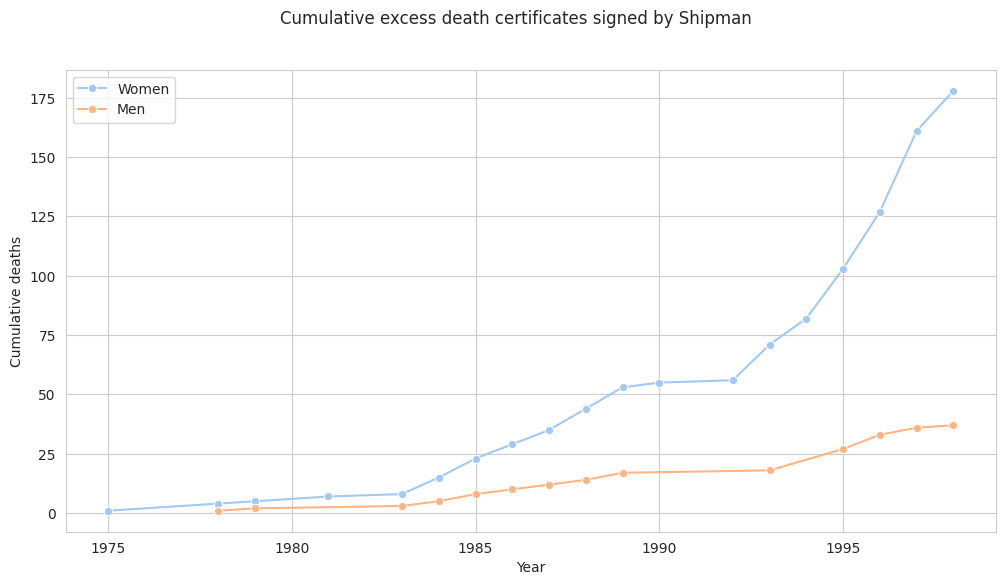

In [13]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=women_death, x='yearOfDeath', y='cumulative', label='Women', marker='o')
sns.lineplot(data=men_death, x='yearOfDeath', y='cumulative', label='Men', marker='o')

plt.suptitle('Cumulative excess death certificates signed by Shipman')
plt.xlabel('Year')
plt.ylabel('Cumulative deaths')
plt.legend()
plt.show()

## Numer of deaths by year and gender

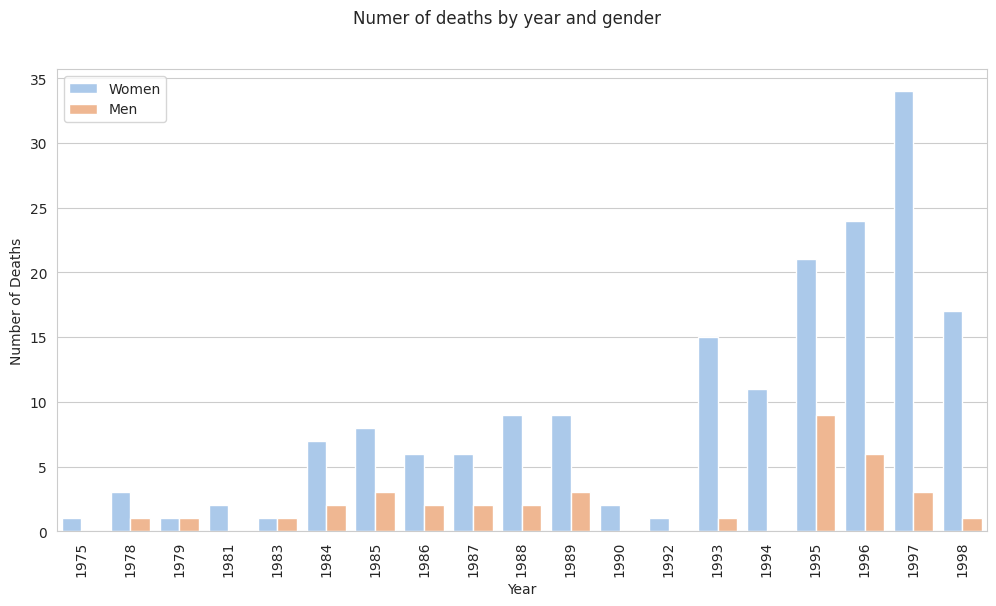

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=victims, x='yearOfDeath', hue='gender2', )

plt.suptitle('Numer of deaths by year and gender')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=90)

plt.legend()
plt.show()

## The time at wich Shipman's patients died, compared to other local practioniers

In [15]:
times = pd.read_csv('/content/00-2-shipman-times-x.csv')
times.head()

,Hour,Shipman,Comparison
0,0,2.6,1.1
1,1,1.0,3.0
2,2,2.6,3.1
3,3,3.0,3.8
4,4,0.3,4.0


In [16]:
times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hour        24 non-null     int64  
 1   Shipman     24 non-null     float64
 2   Comparison  24 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 704.0 bytes


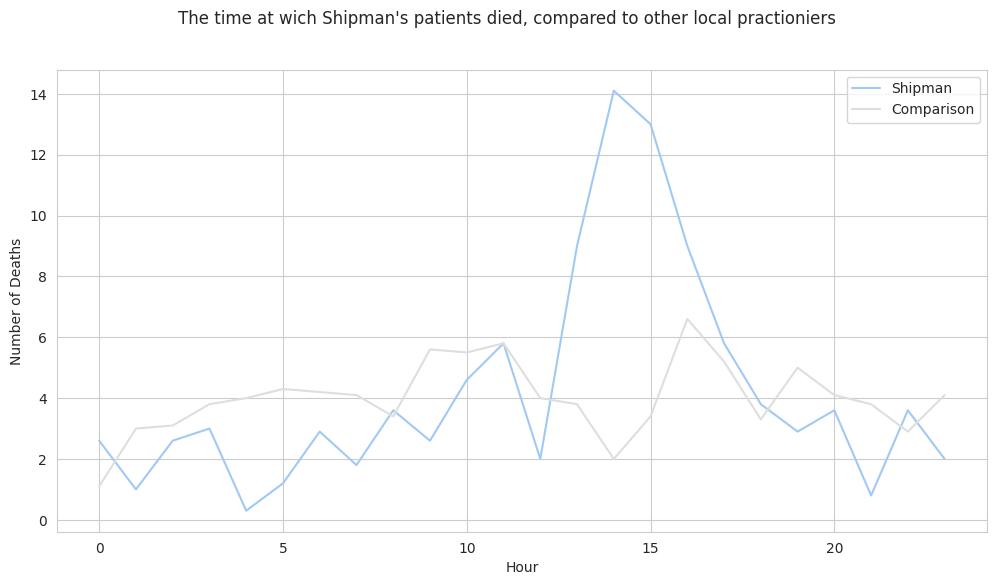

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=times, x='Hour', y='Shipman', label='Shipman')
sns.lineplot(data=times, x='Hour', y='Comparison', color='#dedede', label='Comparison')

plt.suptitle("The time at wich Shipman's patients died, compared to other local practioniers")
plt.xlabel('Hour')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()